In [1]:
import numpy as np
from math import sqrt

from mltools.kmeans import KMeans, KMeansMahalanobis

In [2]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [4]:
X_wine, Y_wine = datasets.load_wine(return_X_y=True)

In [5]:
print(X_wine)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
print(Y_wine)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2) # Сократим размерность до 2
pca.fit(X_wine)
X = pca.transform(X_wine)
Y = Y_wine

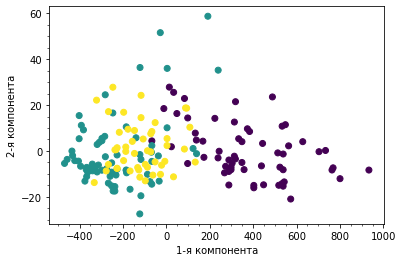

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.minorticks_on()
plt.xlabel("1-я компонента")
plt.ylabel("2-я компонента")
plt.show()

In [30]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [25]:
km = KMeans(3) # 3 кластера

92.2393368460535
27.374063746412396
19.223254502534445
4.7165629177497586
4.748266474623103
21.904810475366116
12.561803189333647
7.272379862980124
4.12972855673487
4.183555074351483
3.905049908381719
0.0


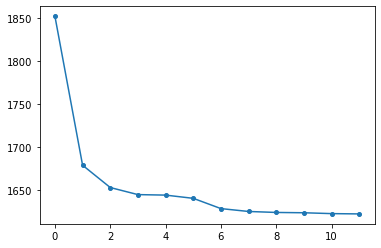

In [26]:
km.fit(X)

plt.plot(km.qvals, marker='o', markersize=4)
plt.show()

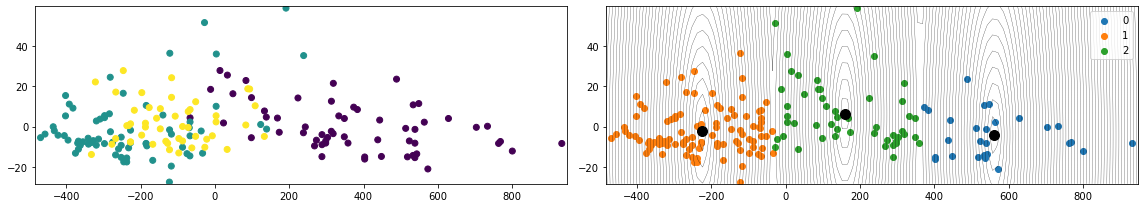

In [29]:
plt.figure(figsize=(16,3), )
plt.subplot(1,2,1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=Y)

plt.subplot(1,2,2)
Is = km.find_clusters(X)
for j, Ij in enumerate(Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(km.c[:,0], km.c[:,1], c='k', s=100)

Z = km.eval_dists(XY)
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 50), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.25, alpha=0.95, colors='k')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

# Справа на графике получили искомые кластера стандартным методом k-means 

In [31]:
kmm = KMeansMahalanobis(3)

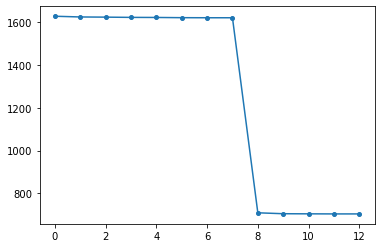

In [32]:
kmm.fit(X)
plt.plot(kmm.qvals, marker='o', markersize=4)
plt.show()

In [33]:
print(kmm.K)
print(kmm.c)
print(kmm.S1)

1
[[ 159.59846763    6.47648456]
 [-225.41068638   -2.01255715]
 [ 561.90981841   -4.15062643]]
[array([[0.1631743 , 0.63697698],
       [0.63697698, 8.61495774]]), array([[ 0.0815324 ,  0.07560169],
       [ 0.07560169, 12.33516522]]), array([[ 0.06915312,  0.17862166],
       [ 0.17862166, 14.92204137]])]


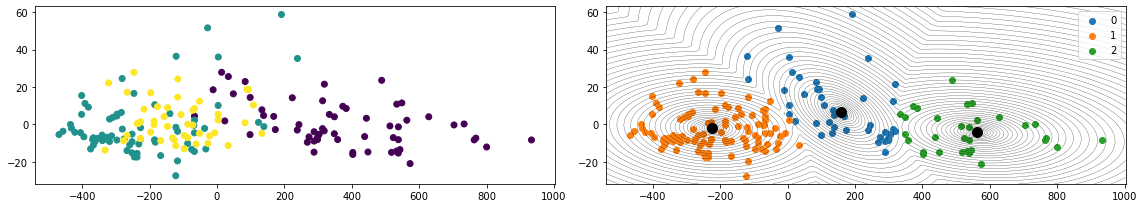

In [34]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.subplot(1,2,2)
for j, Ij in enumerate(kmm.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.sqrt(kmm.eval_dists(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 50), extent=(xmin,xmax,ymin,ymax), linewidths=0.25, alpha=0.95, colors='k')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()